In this problem, you will implement Microsoft Stock Price Prediction with a Machine Learning technique. We will use TensorFlow, an Open-Source Python Machine Learning Framework developed by Google. TensorFlow makes it easy to implement Time Series forecasting data. Since Stock Price Prediction is one of the Time Series Forecasting problems, we will build an end-to-end Microsoft Stock Price Prediction with a Machine learning technique.

In [388]:
# importing necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [389]:
#Loading the dataset and conerting it into a dataframe
Stock_price_dataframe=pd.read_csv("MicrosoftStock.csv")
Stock_price_dataframe

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.710,27.3100,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.920,27.5000,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.000,27.7500,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.110,27.8800,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.060,27.8700,28.04,32663174,MSFT
...,...,...,...,...,...,...,...,...
1254,391452,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT
1255,391453,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT
1256,391454,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT
1257,391455,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT


In [390]:
Stock_price_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB


In [391]:
Stock_price_dataframe.shape

(1259, 8)

In [392]:
Stock_price_dataframe.isna().sum()

index     0
date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [393]:
Stock_price_dataframe=Stock_price_dataframe.drop(columns=['Name','index'])

In [394]:
Stock_price_dataframe.head()

,date,open,high,low,close,volume
0,2013-02-08,27.35,27.71,27.31,27.55,33318306
1,2013-02-11,27.65,27.92,27.50,27.86,32247549
2,2013-02-12,27.88,28.00,27.75,27.88,35990829
3,2013-02-13,27.93,28.11,27.88,28.03,41715530
4,2013-02-14,27.92,28.06,27.87,28.04,32663174


In [395]:
# Rolling Mean / Moving Average to remove the noise in the graph and smoothen it

close_col = Stock_price_dataframe['close']
mvag = close_col.rolling(window=100).mean()     # Taking an average over the window size of 100.
# Increasing the window size can make it more smoother, but less informative and vice-versa.

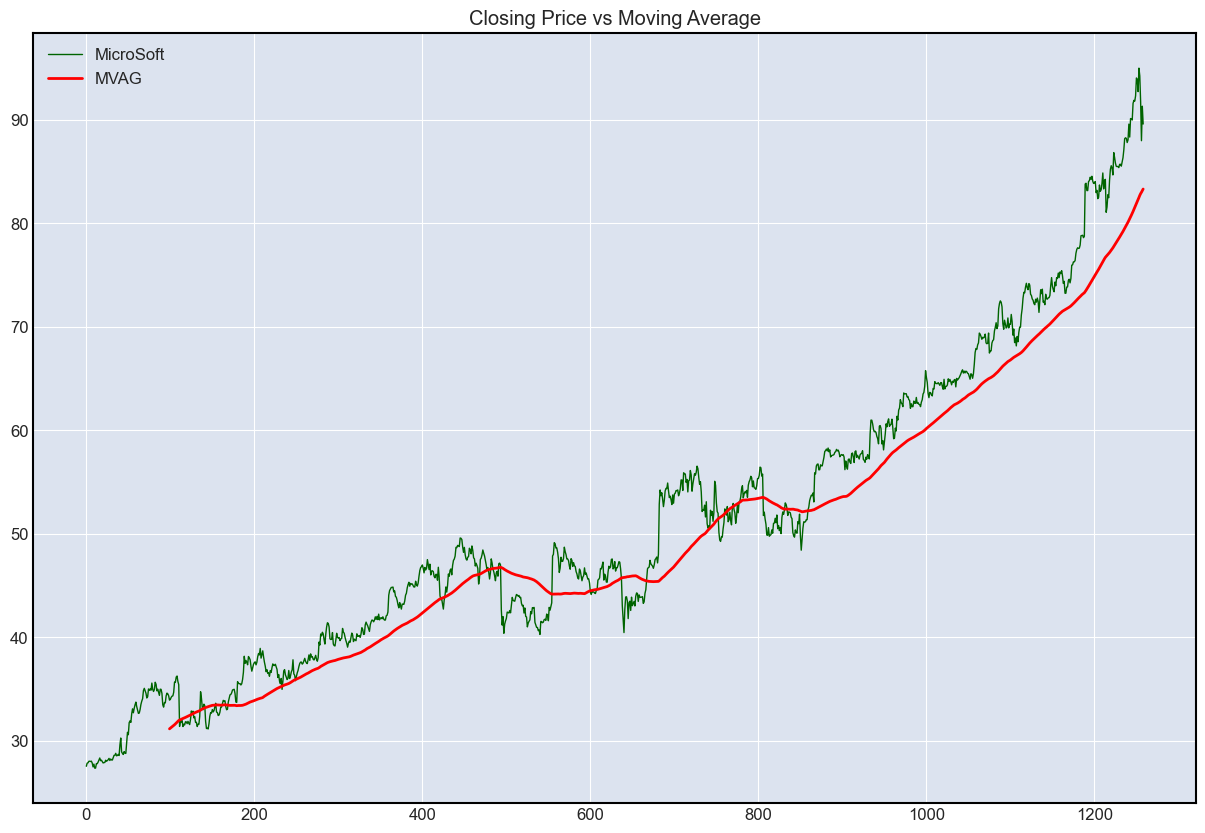

In [396]:
# Visualizing Rolling Mean and Adjusted Closing Price together

Stock_price_dataframe['close'].plot(label='MicroSoft', figsize=(15,10), title='Closing Price vs Moving Average', color='darkgreen', linewidth=1.0, grid=True)
mvag.plot(label='MVAG', color='red')
plt.legend()

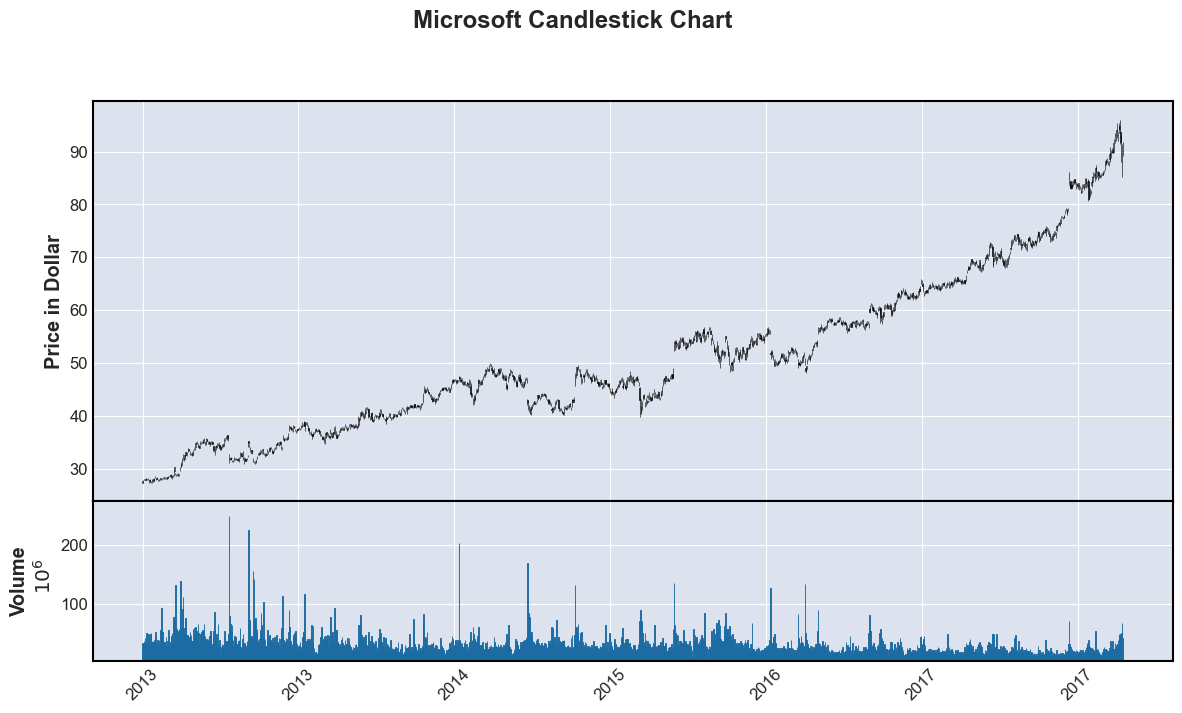

In [397]:
# mplfinance expects the index of your DataFrame to be of type DatetimeIndex
Stock_price_dataframe['date'] = pd.to_datetime(Stock_price_dataframe['date'])  # typecasting 'Date' column to datetime format
Stock_price_dataframe.set_index('date', inplace=True)  # set 'Date' column as index

mpf.plot(Stock_price_dataframe,
         type='candle',
         volume=True,  # used for Showing volume of shares bought
         title='Microsoft Candlestick Chart',
         ylabel='Price in Dollar',
         ylabel_lower='Volume',
         datetime_format='%Y',  # Format for displaying only year on x-axis
         figsize=(15, 8))

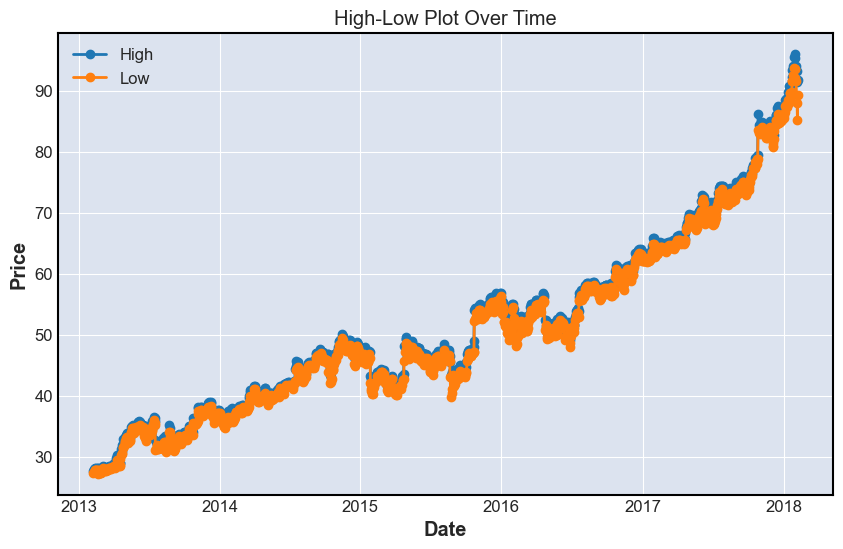

In [398]:
plt.figure(figsize=(10, 6))
plt.plot(Stock_price_dataframe.index, Stock_price_dataframe['high'], label='High', marker='o')
plt.plot(Stock_price_dataframe.index, Stock_price_dataframe['low'], label='Low', marker='o')
plt.title('High-Low Plot Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

<Axes: xlabel='date', ylabel='volume'>

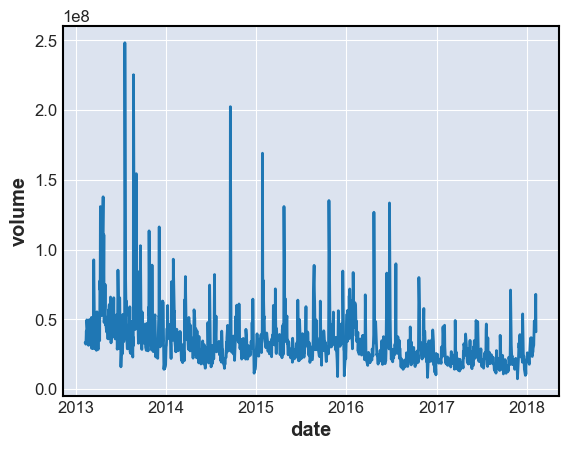

In [399]:
sns.lineplot(x='date',y='volume',data=Stock_price_dataframe)

<Axes: >

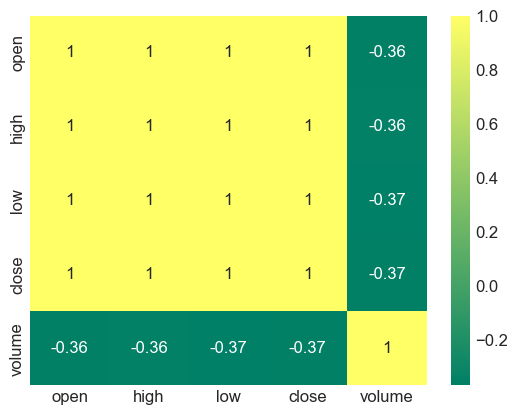

In [400]:
correlations=Stock_price_dataframe.corr()
sns.heatmap(correlations,annot=True,cmap='summer')

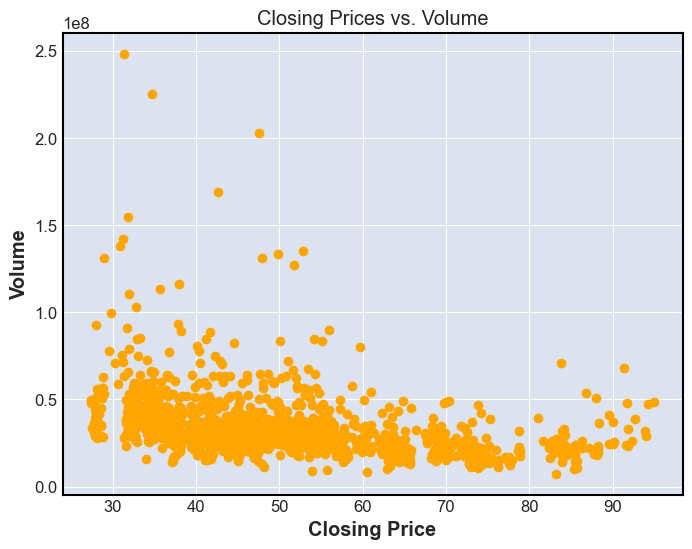

In [401]:
plt.figure(figsize=(8, 6))
plt.scatter(Stock_price_dataframe['close'], Stock_price_dataframe['volume'], color='orange')
plt.title('Closing Prices vs. Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

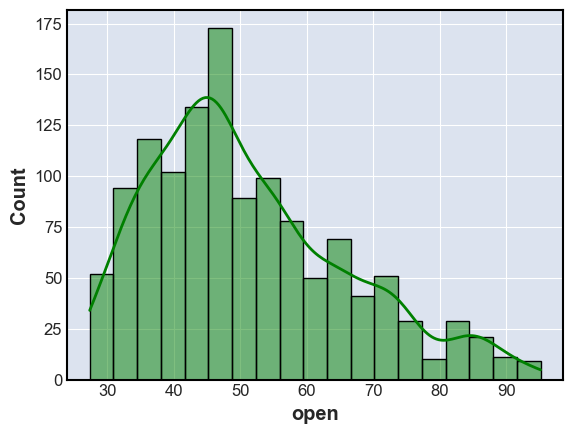

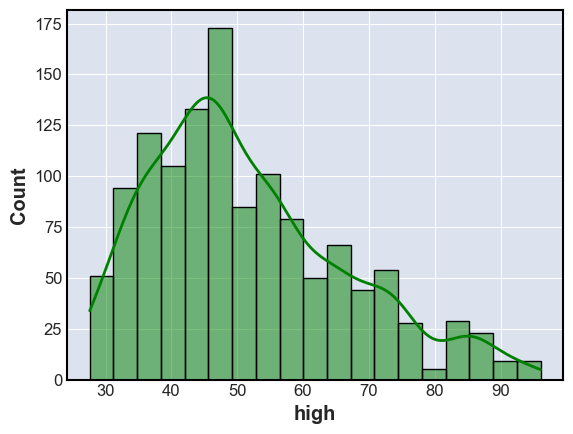

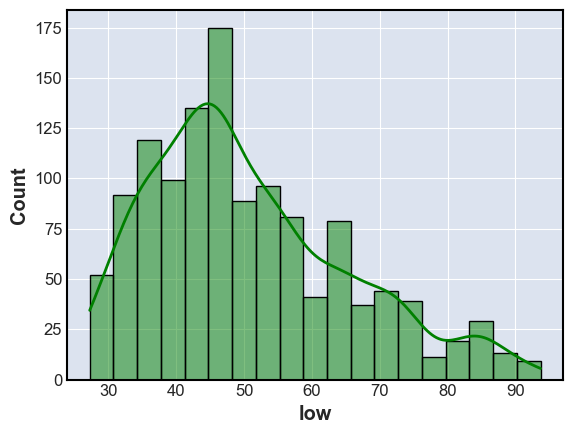

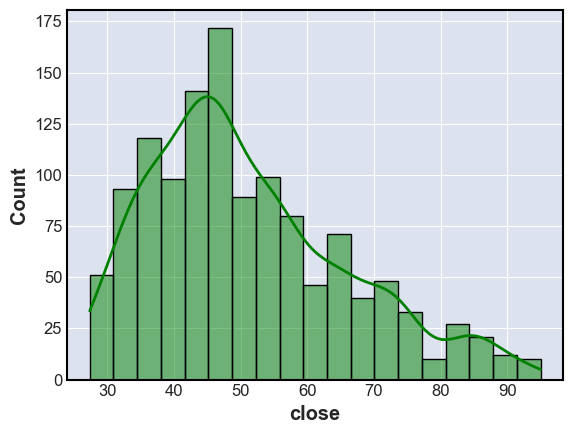

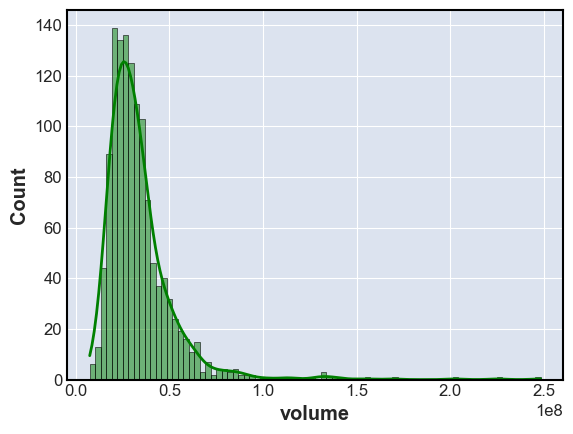

In [402]:
columns = ['open', 'high', 'low', 'close', 'volume']

for i, col in enumerate(columns):
    sns.histplot(data=Stock_price_dataframe, x=Stock_price_dataframe[col],color='green', kde=True)
    plt.show()


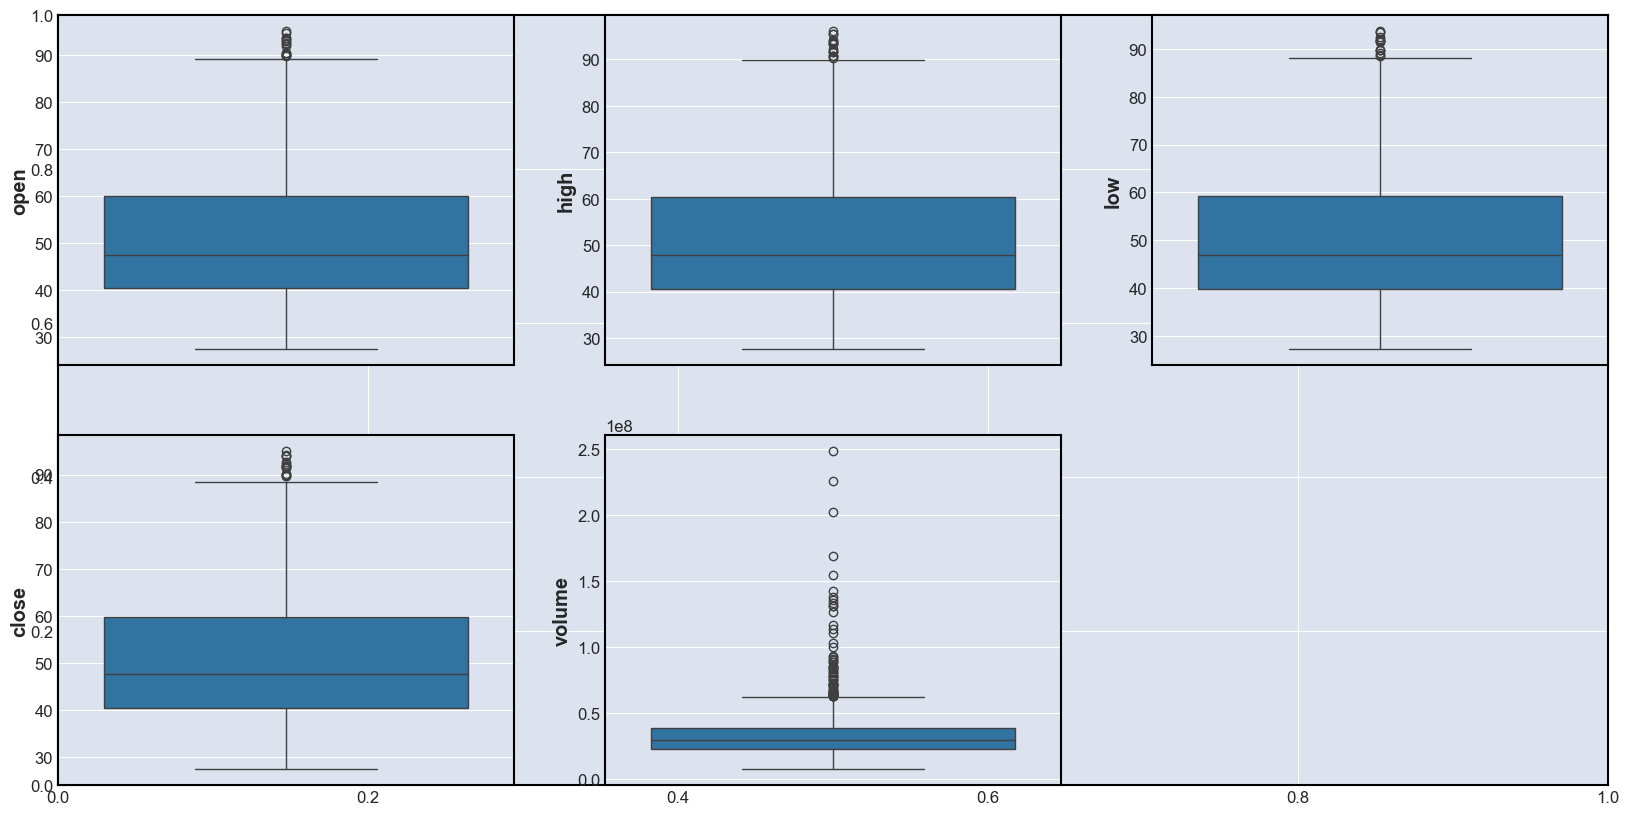

In [403]:
columns = ['open', 'high', 'low', 'close', 'volume']
plt.subplots(figsize=(20,10))
for i, column in enumerate(columns):
  plt.subplot(2,3,i+1)
  sns.boxplot(Stock_price_dataframe[column])
plt.show()

In [404]:
#splitting the data into features and target variable
X=Stock_price_dataframe.drop(columns=['close'])
y=Stock_price_dataframe['close']

In [405]:
#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [406]:
# Initializing the linear_regression_model
linear_regression_model=LinearRegression()

#training the linear_regression_model
linear_regression_model.fit(X_train,y_train)

LinearRegression()

In [407]:
# predicting the values on test data(X_test) and train data(X_train)
testing_prediction_linear_model=linear_regression_model.predict(X_test)
training_prediction_linear_model=linear_regression_model.predict(X_train)

In [408]:
print("R2 score of our model on testing data: ",r2_score(y_test,testing_prediction_linear_model))
print("R2 score of our model on training data: ",r2_score(y_train,training_prediction_linear_model))

R2 score of our model on testing data:  0.9997123561892666
R2 score of our model on training data:  0.9996949821662034


In [409]:
linear_model_mse = mean_squared_error(y_test, testing_prediction_linear_model)
linear_model_rmse = np.sqrt(linear_model_mse)
linear_model_mae = mean_absolute_error(y_test, testing_prediction_linear_model)

print("Mean Squared Error:", linear_model_mse)
print("Root Mean Squared Error:", linear_model_rmse)
print("Mean Absolute Error:", linear_model_mae)

Mean Squared Error: 0.06221498937321386
Root Mean Squared Error: 0.2494293274120224
Mean Absolute Error: 0.18331119637267537


In [410]:
# Initializing the random_forest_model with parameter n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2
random_forest_model=RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_leaf=1, min_samples_split=2)

#training the random_forest_model
random_forest_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, n_estimators=200)

In [411]:
# predicting the values on test data(X_test) and train data(X_train)
testing_prediction_random_forest_model=random_forest_model.predict(X_test)
training_prediction_random_forest_model=random_forest_model.predict(X_train)

In [412]:
random_forest_model_mse = mean_squared_error(y_test, testing_prediction_random_forest_model)
random_forest_model_rmse = np.sqrt(random_forest_model_mse)
random_forest_model_mae = mean_absolute_error(y_test, testing_prediction_random_forest_model)

print("Mean Squared Error:", random_forest_model_mse)
print("Root Mean Squared Error:", random_forest_model_rmse)
print("Mean Absolute Error:", linear_model_mae)

Mean Squared Error: 0.12552787492741116
Root Mean Squared Error: 0.3542991319879448
Mean Absolute Error: 0.18331119637267537


In [413]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

In [414]:
# Defining the Ridge Regression Model

ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)     # Training the algorithm

Ridge(alpha=0.001)

In [415]:
# predicting the values on test data(X_test) and train data(X_train)
testing_prediction_ridge_model=ridge_model.predict(X_test)
training_prediction_ridge_model=ridge_model.predict(X_train)

In [416]:
print("R2 score of our model on testing data: ",r2_score(y_test,testing_prediction_ridge_model))
print("R2 score of our model on training data: ",r2_score(y_train,training_prediction_ridge_model))

R2 score of our model on testing data:  0.9997123582019141
R2 score of our model on training data:  0.9996949821661071


In [417]:
ridge_model_mse = mean_squared_error(y_test, testing_prediction_ridge_model)
ridge_model_rmse = np.sqrt(ridge_model_mse)
ridge_model_mae = mean_absolute_error(y_test, testing_prediction_ridge_model)

print("Mean Squared Error:", ridge_model_mse)
print("Root Mean Squared Error:", ridge_model_rmse)
print("Mean Absolute Error:", ridge_model_mae)

Mean Squared Error: 0.06221455405413522
Root Mean Squared Error: 0.24942845478039433
Mean Absolute Error: 0.18331164267657343


In [418]:
# Defining the Ridge Regression Model

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)     # Training the algorithm

Lasso()

In [419]:
# predicting the values on test data(X_test) and train data(X_train)
testing_prediction_lasso_model=lasso_model.predict(X_test)
training_prediction_lasso_model=lasso_model.predict(X_train)

In [420]:
print("R2 score of our model on testing data: ",r2_score(y_test,testing_prediction_lasso_model))
print("R2 score of our model on training data: ",r2_score(y_train,training_prediction_lasso_model))

R2 score of our model on testing data:  0.999188140380834
R2 score of our model on training data:  0.9992093789000258


In [421]:
lasso_model_mse = mean_squared_error(y_test, testing_prediction_lasso_model)
lasso_model_rmse = np.sqrt(linear_model_mse)
lasso_model_mae = mean_absolute_error(y_test, testing_prediction_lasso_model)

print("Mean Squared Error:", lasso_model_mse)
print("Root Mean Squared Error:", lasso_model_rmse)
print("Mean Absolute Error:", lasso_model_mae)

Mean Squared Error: 0.17559855520676354
Root Mean Squared Error: 0.2494293274120224
Mean Absolute Error: 0.30337324979992725


In [422]:
# Initializing the support_vector_regressor_model with parameter n_estimators=100, random_state=42
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

#training the gradient_boosting_model
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [423]:
# predicting the values on test data(X_test) and train data(X_train)
testing_prediction_gradient_boosting_model=gradient_boosting_model.predict(X_test)
training_prediction_gradient_boosting_model=gradient_boosting_model.predict(X_train)

In [424]:
gradient_boosting_model_mse = mean_squared_error(y_test, testing_prediction_gradient_boosting_model)
gradient_boosting_model_rmse = np.sqrt(gradient_boosting_model_mse)
gradient_boosting_model_mae = mean_absolute_error(y_test, testing_prediction_gradient_boosting_model)

print("Mean Squared Error:", gradient_boosting_model_mse)
print("Root Mean Squared Error:", gradient_boosting_model_rmse)
print("Mean Absolute Error:", gradient_boosting_model_mae)

Mean Squared Error: 0.14599699789077997
Root Mean Squared Error: 0.3820955350312013
Mean Absolute Error: 0.2946735547797373


In [425]:
from tabulate import tabulate

mse_data = [
    ["Linear Regression", linear_model_mse],
    ["Lasso Regression", lasso_model_mse],
    ["Ridge Regression", ridge_model_mse],
    ["Random Forest Regression", random_forest_model_mse],
    ["Gradient Boosting Regression", gradient_boosting_model_mse],
]

print(tabulate(mse_data, headers=["Model", "Mean Squared Error"], tablefmt="grid"))

+------------------------------+----------------------+
| Model                        |   Mean Squared Error |
+==============================+======================+
| Linear Regression            |            0.062215  |
+------------------------------+----------------------+
| Lasso Regression             |            0.175599  |
+------------------------------+----------------------+
| Ridge Regression             |            0.0622146 |
+------------------------------+----------------------+
| Random Forest Regression     |            0.125528  |
+------------------------------+----------------------+
| Gradient Boosting Regression |            0.145997  |
+------------------------------+----------------------+


So among all the algorithms I have used Ridge and linear regression have the minimum mean squared error.
So they are the best fit for this given set of data.

Now we will shift to some other advanced algorithms which will be best suited for this type of data.

In [426]:
# Target column
target_close = pd.DataFrame(Stock_price_dataframe['close'])
display(Stock_price_dataframe.head())

,open,high,low,close,volume
date,,,,,
2013-02-08,27.35,27.71,27.31,27.55,33318306
2013-02-11,27.65,27.92,27.50,27.86,32247549
2013-02-12,27.88,28.00,27.75,27.88,35990829
2013-02-13,27.93,28.11,27.88,28.03,41715530
2013-02-14,27.92,28.06,27.87,28.04,32663174


In [427]:
# selecting Feature Columns
feature_columns = ['open', 'high', 'low', 'volume']

Normalizing the data

In [428]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(Stock_price_dataframe[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=Stock_price_dataframe.index)
feature_minmax_transform.head()

,open,high,low,volume
date,,,,
2013-02-08,0.000000,0.001607,0.001203,0.107470
2013-02-11,0.004425,0.004674,0.004061,0.103026
2013-02-12,0.007818,0.005842,0.007821,0.118563
2013-02-13,0.008556,0.007449,0.009776,0.142324
2013-02-14,0.008408,0.006718,0.009626,0.104751


In [429]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_close.shape)

# Shifting target array because we want to predict the n + 1 day value
target_close = target_close.shift(-1)
validation_y = target_close[-90:-1]
target_close = target_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_close.shape)
display(target_close.tail())

,open,high,low,volume
date,,,,
2013-02-08,0.000000,0.001607,0.001203,0.107470
2013-02-11,0.004425,0.004674,0.004061,0.103026
2013-02-12,0.007818,0.005842,0.007821,0.118563
2013-02-13,0.008556,0.007449,0.009776,0.142324
2013-02-14,0.008408,0.006718,0.009626,0.104751


Shape of features :  (1259, 4)
Shape of target :  (1259, 1)


,open,high,low,volume
date,,,,
2018-01-31,0.979496,0.990215,0.996842,0.171548
2018-02-01,0.994837,1.000000,0.997914,0.165204
2018-02-02,0.977873,0.969330,0.966612,0.167859
2018-02-05,0.932438,0.958668,0.913972,0.180991
2018-02-06,0.878301,0.932890,0.872612,0.251415


,close
date,
2018-01-31,94.26
2018-02-01,91.78
2018-02-02,88.00
2018-02-05,91.33
2018-02-06,89.61



 -----After process------ 

Shape of features :  (1169, 4)
Shape of target :  (1169, 1)


,close
date,
2017-09-22,73.26
2017-09-25,73.26
2017-09-26,73.85
2017-09-27,73.87
2017-09-28,74.49


In [430]:
# Train test Split using Timeseriessplit
from sklearn.model_selection import TimeSeriesSplit

ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_close[:len(train_index)].values.ravel(), target_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [431]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)
    RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))
    print('RMSE: ', RSME_score)
    
    R2_score = r2_score(validation_y, predicted)
    print('R2 score: ', R2_score)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

In [432]:
# Processing the data for LSTM
X_train =np.array(X_train)
X_test =np.array(X_test)

X_train_processed = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_processed = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [433]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM

In [434]:
# building model of LSTM
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_train_processed, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200


133/133 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1496.2864
Epoch 2/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1452.4050
Epoch 3/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1365.3088
Epoch 4/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1220.0826
Epoch 5/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1025.2810
Epoch 6/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 806.1234
Epoch 7/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 591.1830
Epoch 8/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 403.0484
Epoch 9/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 254.6550
Epoch 10/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 149.1703
Epoch 11/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 81.9374
Epoch 12/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 43.7245
Epoch 13/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 24.3627
Epoch 14/200
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.5153
Epoch 15/200
133/133 ━━━━━

In [435]:
# Evaluating of Model
y_pred_test_lstm = model_lstm.predict(X_test_processed)
y_train_pred_lstm = model_lstm.predict(X_train_processed)

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
The R2 score on the Test set is:	0.888


In [436]:
# Predictions made by LSTM
score_lstm= model_lstm.evaluate(X_test_processed, y_test, batch_size=1)

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5198


In [437]:
print('LSTM: %f'%score_lstm)

LSTM: 0.533109


In [438]:
y_pred_test_LSTM = model_lstm.predict(X_test_processed)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


LSTM's Prediction Visual

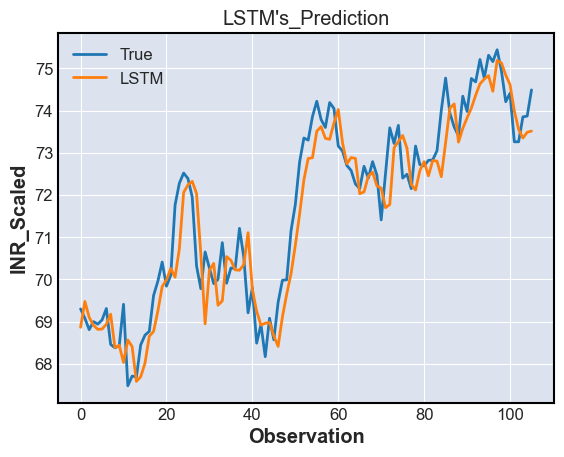

In [439]:
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM's_Prediction")
plt.xlabel('Observation')
plt.ylabel('INR_Scaled')
plt.legend()
plt.show()